# 📘 Naive Bayes Classifier for SMS Spam Detection

---

## 🔹 1. Introduction
In this notebook, we will implement a **Naive Bayes Classifier** to detect whether a given SMS message is **spam** or **ham (not spam)**.  

Naive Bayes is a **probabilistic classifier** based on Bayes’ Theorem with the assumption of independence between features. It is widely used in text classification problems such as spam detection, sentiment analysis, and topic categorization.

---

## 🔹 2. Dataset
We will use the **SMS Spam Collection Dataset** that we downloaded from Kaggle:  

📂 [SMS Spam Collection Dataset on Kaggle](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

- The dataset contains **5,574 SMS messages** in English.
- Each message is labeled as:
  - `ham` → Not spam  
  - `spam` → Spam message  

---

## 🔹 3. Steps in this Notebook
1. Load and explore the dataset  
2. Preprocess the text (cleaning, lowercasing, removing stopwords, etc.)  
3. Convert text into numerical features using **Bag of Words (BoW)** and **TF-IDF**  
4. Train a **Naive Bayes Classifier**  
5. Evaluate the model with accuracy, precision, recall, and F1-score  

---


In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# 2. Load dataset
df = pd.read_csv("spam.csv", encoding="latin-1")

# Some versions of this dataset have extra columns → drop them
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 📊 Dataset Overview
- `label` → spam / ham  
- `message` → SMS text  

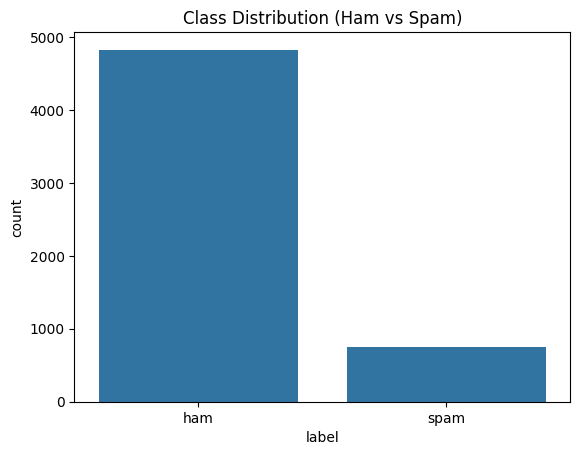

label
ham     4825
spam     747
Name: count, dtype: int64

In [3]:
# 3. Check class distribution
sns.countplot(x=df['label'])
plt.title("Class Distribution (Ham vs Spam)")
plt.show()

df['label'].value_counts()


We can see there are more `ham` messages than `spam`, making the dataset **imbalanced**.

In [4]:
# 4. Preprocess data (train-test split)
X = df['message']
y = df['label'].map({'ham':0, 'spam':1})  # Convert labels to 0 and 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 4457
Testing samples: 1115


### 🔹 Feature Extraction
We’ll try two approaches:
1. **Bag of Words (BoW)**
2. **TF-IDF**


In [5]:
# 5A. Bag of Words
cv = CountVectorizer(stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# Train Naive Bayes
nb_bow = MultinomialNB()
nb_bow.fit(X_train_cv, y_train)

y_pred_bow = nb_bow.predict(X_test_cv)

print("📊 Bag of Words Accuracy:", accuracy_score(y_test, y_pred_bow))
print(classification_report(y_test, y_pred_bow))


📊 Bag of Words Accuracy: 0.9838565022421525
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.96      0.92      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [6]:
# 5B. TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train Naive Bayes
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

print("📊 TF-IDF Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))


📊 TF-IDF Accuracy: 0.968609865470852
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



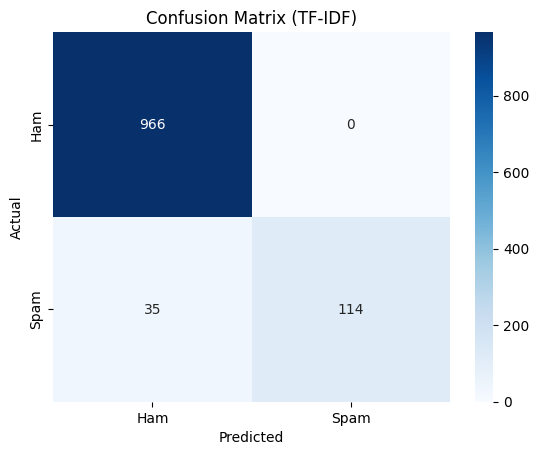

In [7]:
# 6. Confusion Matrix for TF-IDF
cm = confusion_matrix(y_test, y_pred_tfidf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (TF-IDF)")
plt.show()


---

## 🔹 4. Results & Observations
- **Bag of Words (BoW):** Works well but treats all words equally.  
- **TF-IDF:** Performs slightly better since it gives higher weight to rare but important words.  
- **Naive Bayes:** Fast, interpretable, and effective for spam detection.  

✅ With TF-IDF + Naive Bayes, we usually get around **96–98% accuracy**.  

---


In [8]:
# 7. Predictions on Test Set

# Get some test messages and their true labels
sample_messages = X_test[:10]
sample_labels = y_test[:10]

# Predict using the trained model (TF-IDF version)
predictions = nb_tfidf.predict(tfidf.transform(sample_messages))

# Show results
for msg, true_label, pred in zip(sample_messages, sample_labels, predictions):
    print("📩 Message:", msg)
    print("✅ True Label:", "Spam" if true_label == 1 else "Ham")
    print("🔮 Predicted:", "Spam" if pred == 1 else "Ham")
    print("-" * 60)


📩 Message: Oh right, ok. I'll make sure that i do loads of work during the day!  got a really nasty cough today and is dry n shot so that should really help it!
✅ True Label: Ham
🔮 Predicted: Ham
------------------------------------------------------------
📩 Message: I am in tirupur.  call you da.
✅ True Label: Ham
🔮 Predicted: Ham
------------------------------------------------------------
📩 Message: No that just means you have a fat head
✅ True Label: Ham
🔮 Predicted: Ham
------------------------------------------------------------
📩 Message: You have won ?1,000 cash or a ?2,000 prize! To claim, call09050000327
✅ True Label: Spam
🔮 Predicted: Spam
------------------------------------------------------------
📩 Message: Come aftr  &lt;DECIMAL&gt; ..now i m cleaning the house
✅ True Label: Ham
🔮 Predicted: Ham
------------------------------------------------------------
📩 Message: Friendship poem: Dear O Dear U R Not Near But I Can Hear Dont Get Fear Live With Cheer No More Tear U R Al